In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_before = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/Unemployement_data/Unemployment in India.csv")
data_before.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data_after = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/Unemployement_data/Unemployment_Rate_upto_11_2020.csv")
data_after.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
# Converting data type of date
data_before[' Date'] = pd.to_datetime(data_before[' Date'], dayfirst=True)
data_after[' Date'] = pd.to_datetime(data_after[' Date'], dayfirst=True)

In [7]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(4),

In [8]:
data_before.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
# Dropping missing values
data_before = data_before.dropna()

In [10]:
# data before contains date which is in Data after so lets drop those values
y = data_after[' Date'].unique()
data_before = data_before[~data_before[' Date'].isin(y)]
data_before[' Date'].unique()

<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00']
Length: 8, dtype: datetime64[ns]

In [11]:
data_before.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,430,430.000000,4.300000e+02,430.000000
mean,2019-09-14 20:59:09.767441920,9.399047,7.422976e+06,43.885860
min,2019-05-31 00:00:00,0.000000,8.797400e+04,26.330000
25%,2019-07-07 18:00:00,4.282500,1.159423e+06,39.327500
50%,2019-09-15 00:00:00,7.115000,4.989884e+06,42.570000
75%,2019-11-22 12:00:00,12.560000,1.160082e+07,45.932500
max,2019-12-31 00:00:00,34.690000,4.464009e+07,72.570000
std,NaN,7.218452,8.254003e+06,7.369948


In [12]:
data_after.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


#### Distribution Of variables

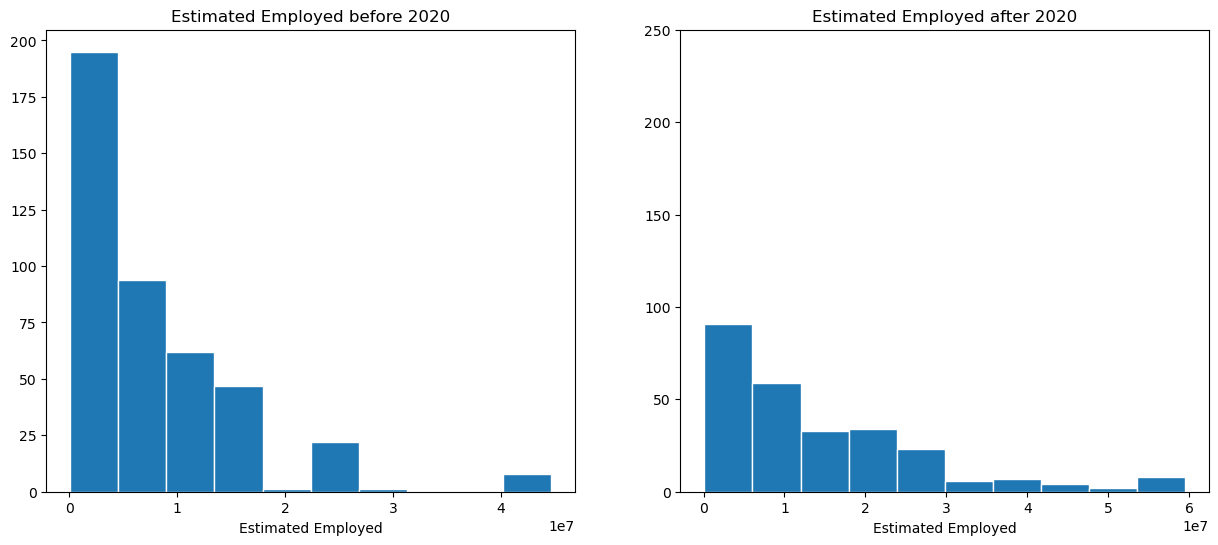

In [13]:
#cols = [col for col in data_before.columns if col in data_before.select_dtypes(include = 'number')]
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].hist(data_before[' Estimated Employed'], edgecolor = 'w', bins = 10)
ax[0].set_title('Estimated Employed before 2020')
ax[0].set_xlabel('Estimated Employed')

ax[1].hist(data_after[' Estimated Employed'], edgecolor = 'w', bins = 10)
ax[1].set_title('Estimated Employed after 2020')
ax[1].set_xlabel('Estimated Employed')
ax[1].set_ylim((0,250))
plt.show()

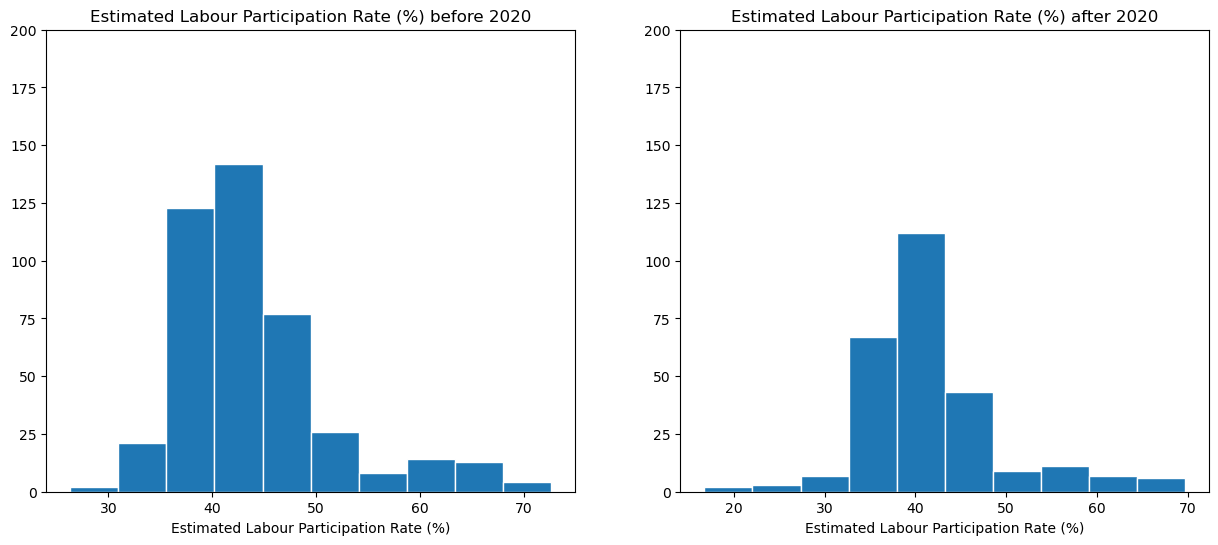

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].hist(data_before[' Estimated Labour Participation Rate (%)'], edgecolor = 'w', bins = 10)
ax[0].set_title('Estimated Labour Participation Rate (%) before 2020')
ax[0].set_xlabel('Estimated Labour Participation Rate (%)')
ax[0].set_ylim((0,200))

ax[1].hist(data_after[' Estimated Labour Participation Rate (%)'], edgecolor = 'w', bins = 10)
ax[1].set_title('Estimated Labour Participation Rate (%) after 2020')
ax[1].set_xlabel('Estimated Labour Participation Rate (%)')
ax[1].set_ylim((0,200))
plt.show()

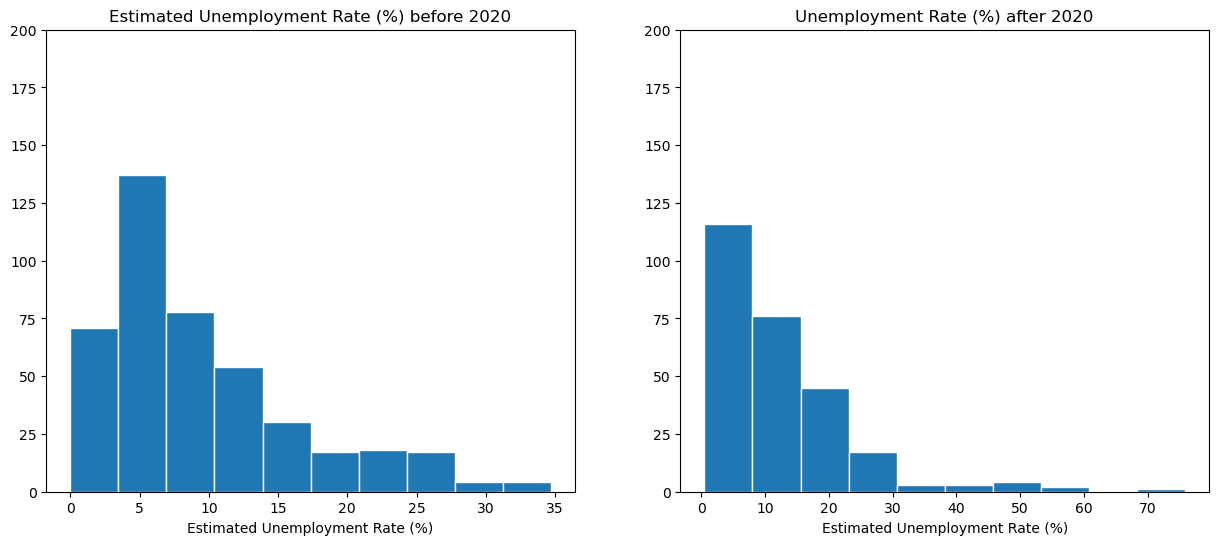

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].hist(data_before[' Estimated Unemployment Rate (%)'], edgecolor = 'w', bins = 10)
ax[0].set_title('Estimated Unemployment Rate (%) before 2020')
ax[0].set_xlabel('Estimated Unemployment Rate (%)')
ax[0].set_ylim((0,200))

ax[1].hist(data_after[' Estimated Unemployment Rate (%)'], edgecolor = 'w', bins = 10)
ax[1].set_title('Unemployment Rate (%) after 2020')
ax[1].set_xlabel('Estimated Unemployment Rate (%)')
ax[1].set_ylim((0,200))
plt.show()

#### Average And Total of the variables before and in 2020

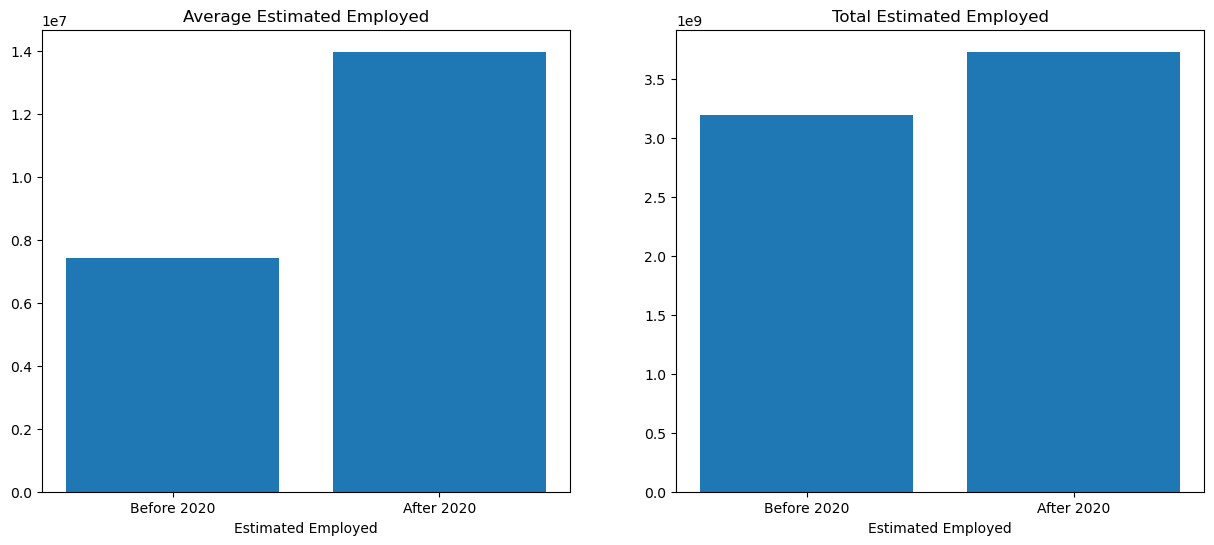

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))
avg_before = data_before[' Estimated Employed'].mean()
avg_after = data_after[' Estimated Employed'].mean()

ax[0].bar(['Before 2020', 'After 2020' ], [avg_before, avg_after])
ax[0].set_title('Average Estimated Employed')
ax[0].set_xlabel('Estimated Employed')

sum_before = data_before[' Estimated Employed'].sum()
sum_after = data_after[' Estimated Employed'].sum()

ax[1].bar(['Before 2020', 'After 2020' ], [sum_before, sum_after])
ax[1].set_title('Total Estimated Employed')
ax[1].set_xlabel('Estimated Employed')

plt.show()

In [17]:
if avg_before > avg_after:
    print('On an average Estimated Employed in 2020 Decreased ')
else:
    print('On an average Estimated Employed in 2020 Increased')

print(f'\nTotal Estimated Employed before 2020 : {sum_before} ')
print(f'Total Estimated Employed in 2020 : {sum_after} ')

On an average Estimated Employed in 2020 Increased

Total Estimated Employed before 2020 : 3191879881.0 
Total Estimated Employed in 2020 : 3727882228 


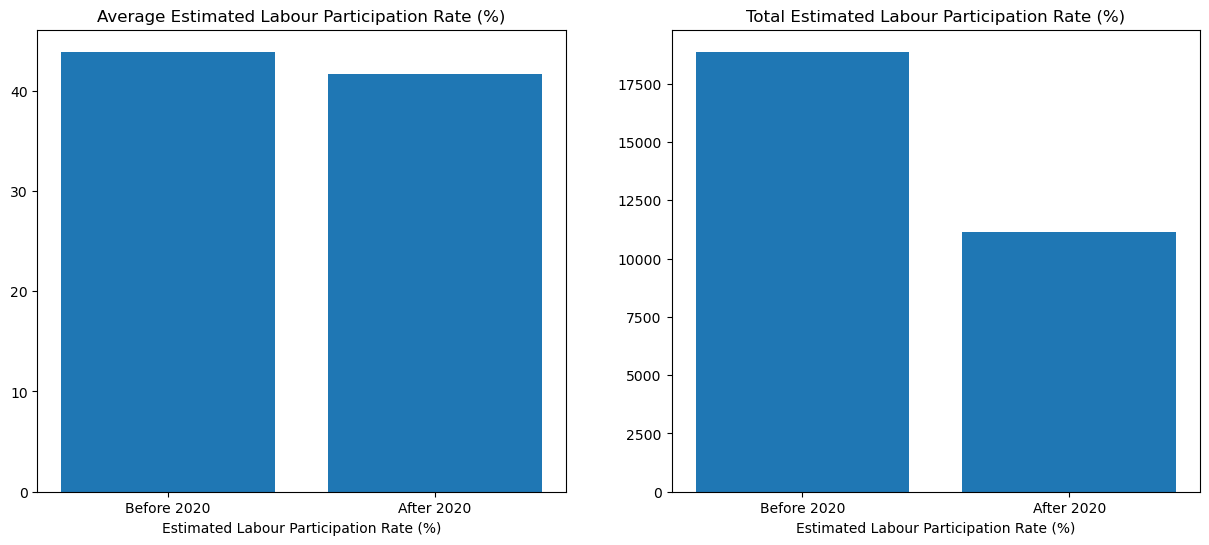

In [18]:

fig, ax = plt.subplots(1, 2, figsize = (15,6))
avg_before = data_before[' Estimated Labour Participation Rate (%)'].mean()
avg_after = data_after[' Estimated Labour Participation Rate (%)'].mean()

ax[0].bar(['Before 2020', 'After 2020' ], [avg_before, avg_after])
ax[0].set_title('Average Estimated Labour Participation Rate (%)')
ax[0].set_xlabel('Estimated Labour Participation Rate (%)')

sum_before = data_before[' Estimated Labour Participation Rate (%)'].sum()
sum_after = data_after[' Estimated Labour Participation Rate (%)'].sum()

ax[1].bar(['Before 2020', 'After 2020' ], [sum_before, sum_after])
ax[1].set_title('Total Estimated Labour Participation Rate (%)')
ax[1].set_xlabel('Estimated Labour Participation Rate (%)')
plt.show()

In [19]:
if avg_before > avg_after:
    print('On an average Estimated Labour Participation Rate (%) in 2020 Decreased ')
else:
    print('On an average Estimated Labour Participation Rate (%) in 2020 Increased')

print(f'\nTotal Estimated Employed before 2020 : {sum_before:.2f} ')
print(f'Total Estimated Employed in 2020 : {sum_after:.2f} ')

On an average Estimated Labour Participation Rate (%) in 2020 Decreased 

Total Estimated Employed before 2020 : 18870.92 
Total Estimated Employed in 2020 : 11128.98 


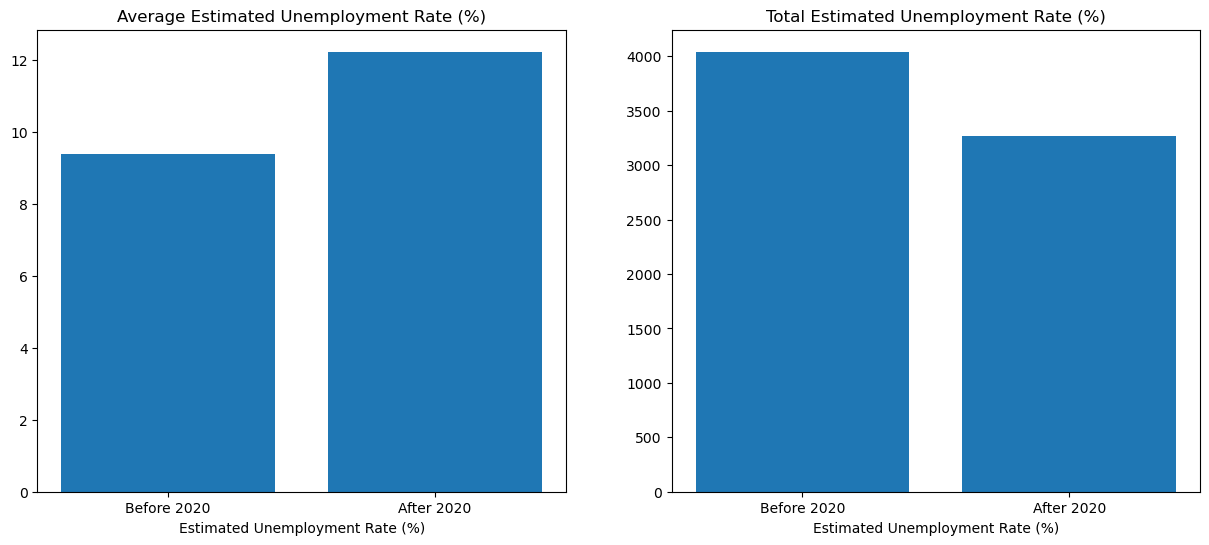

In [20]:

fig, ax = plt.subplots(1, 2, figsize = (15,6))
avg_before = data_before[' Estimated Unemployment Rate (%)'].mean()
avg_after = data_after[' Estimated Unemployment Rate (%)'].mean()

ax[0].bar(['Before 2020', 'After 2020' ], [avg_before, avg_after])
ax[0].set_title('Average Estimated Unemployment Rate (%)')
ax[0].set_xlabel('Estimated Unemployment Rate (%)')

sum_before = data_before[' Estimated Unemployment Rate (%)'].sum()
sum_after = data_after[' Estimated Unemployment Rate (%)'].sum()

ax[1].bar(['Before 2020', 'After 2020' ], [sum_before, sum_after])
ax[1].set_title('Total Estimated Unemployment Rate (%)')
ax[1].set_xlabel('Estimated Unemployment Rate (%)')
plt.show()

In [21]:
if avg_before > avg_after:
    print('On an average Estimated Unemployment Rate (%) in 2020 Decreased ')
else:
    print('On an average Estimated Unemployment Rate (%) in 2020 Increased')

print(f'\nTotal Estimated Employed before 2020 : {sum_before:.2f} ')
print(f'Total Estimated Employed in 2020 : {sum_after:.2f} ')

On an average Estimated Unemployment Rate (%) in 2020 Increased

Total Estimated Employed before 2020 : 4041.59 
Total Estimated Employed in 2020 : 3267.26 


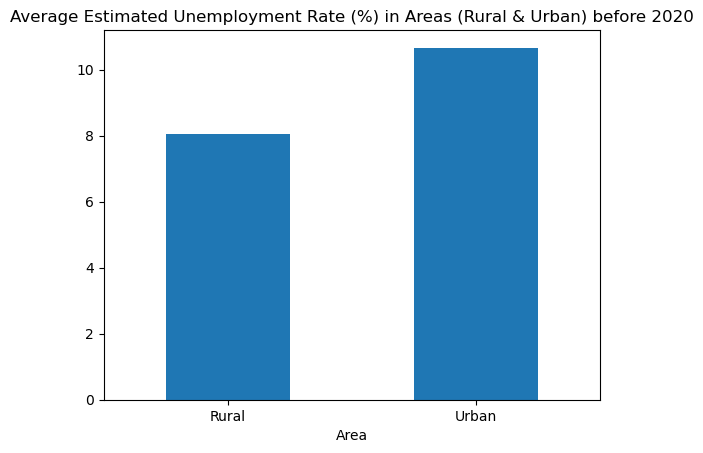

In [22]:
df_area = data_before.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()
df_area.plot.bar(rot = 0)
plt.title('Average Estimated Unemployment Rate (%) in Areas (Rural & Urban) before 2020')
plt.show()

#### Average unemployment rate in the regions

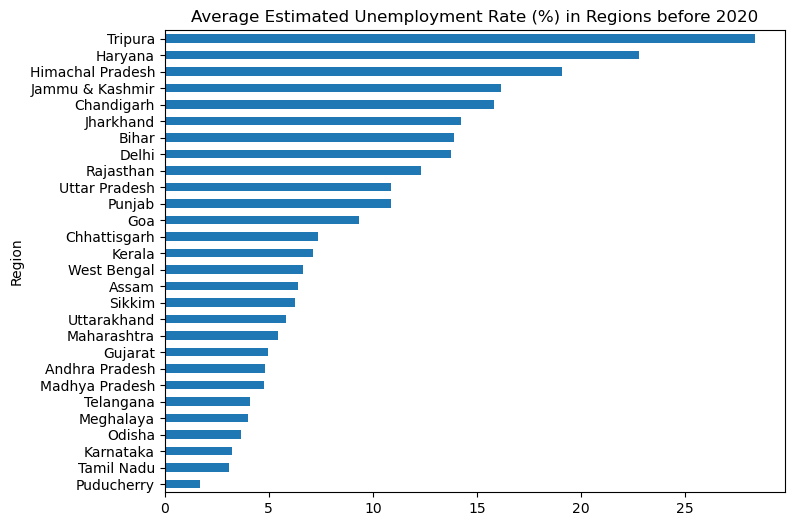

In [23]:
df_region = data_before.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
plt.figure(figsize = (8,6))
df_region.plot.barh(rot = 0)
plt.title('Average Estimated Unemployment Rate (%) in Regions before 2020')
plt.show()

In [24]:
print('Heighest Unemployed Regions before 2020: ')
for index in df_region.sort_values(ascending = False).index[:10]:
    print(index)

Heighest Unemployed Regions before 2020: 
Tripura
Haryana
Himachal Pradesh
Jammu & Kashmir
Chandigarh
Jharkhand
Bihar
Delhi
Rajasthan
Uttar Pradesh


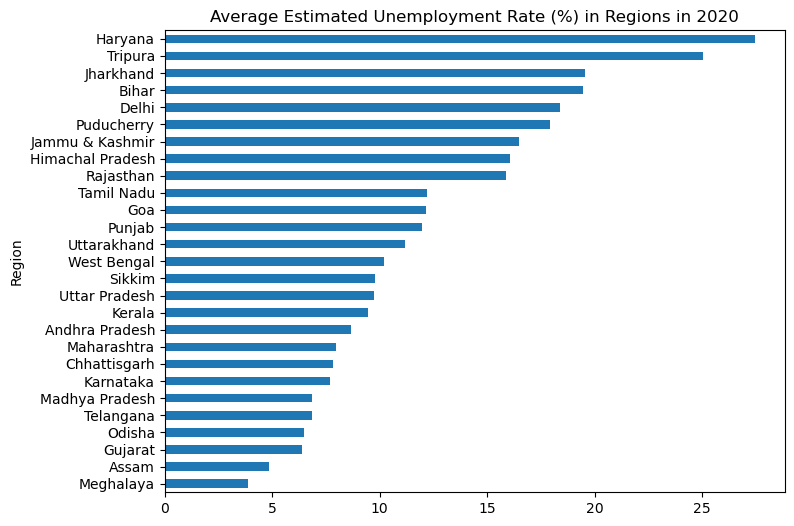

In [25]:
df_regions = data_after.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
plt.figure(figsize = (8,6))
df_regions.plot.barh()
plt.title('Average Estimated Unemployment Rate (%) in Regions in 2020')
plt.show()

In [26]:
print('Heighest Unemployed Regions in 2020: ')
for index in df_regions.sort_values(ascending = False).index[:10]:
    print(index)

Heighest Unemployed Regions in 2020: 
Haryana
Tripura
Jharkhand
Bihar
Delhi
Puducherry
Jammu & Kashmir
Himachal Pradesh
Rajasthan
Tamil Nadu


#### avreage unemployement rate in particular months

In [27]:
month_df1 = data_before
month_df2 = data_after
month_df1[' Month'] = month_df1[' Date'].dt.month
month_df2[' Month'] = month_df2[' Date'].dt.month


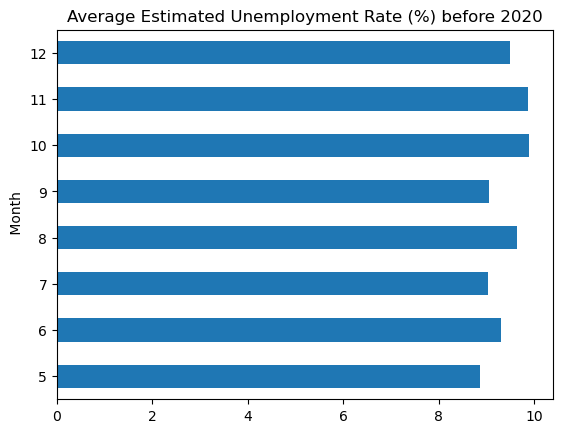

In [28]:

df_date1 = month_df1.groupby(' Month')[' Estimated Unemployment Rate (%)'].mean()

df_date1.plot.barh()
plt.title('Average Estimated Unemployment Rate (%) before 2020')

plt.show()

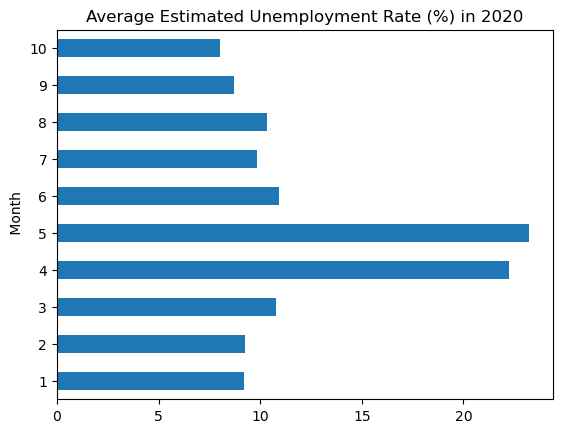

In [29]:
df_date2 = month_df2.groupby(' Month')[' Estimated Unemployment Rate (%)'].mean()

df_date2.plot.barh()
plt.title('Average Estimated Unemployment Rate (%) in 2020')
plt.show()

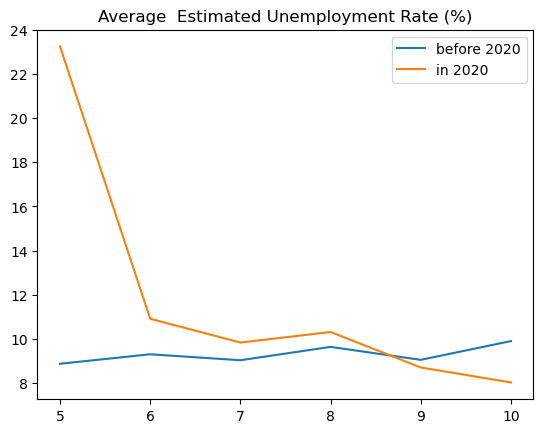

In [30]:
month_list = [month for month in df_date1.index if month in df_date2.index]
month_list
plt.plot(month_list, df_date1[month_list], label = 'before 2020')
plt.plot(month_list, df_date2[month_list], label = 'in 2020')
plt.title('Average  Estimated Unemployment Rate (%)')
plt.legend()
plt.show()

In [31]:
print('Average unemployement rate is increased in: ')
for month in month_list:
    if df_date1[month] < df_date2[month]:
        print(f'Month {month}')
print()
print('Average unemployement rate is decreased in: ')
for month in month_list:
    if df_date1[month] > df_date2[month]:
        print(f'Month {month}')


Average unemployement rate is increased in: 
Month 5
Month 6
Month 7
Month 8

Average unemployement rate is decreased in: 
Month 9
Month 10
